# I. Estimate errors for $\overline{N_{HI}}$  vs W$_0^{\lambda2796}$ data by bootstrap resampling.

The binning of the data set is provided by Sandhya. July 13, 2016

In [1]:
from IPython.core.display import HTML
css = open('/home/ec2-user/blog/posts/style-table.css').read() \
+ open('/home/ec2-user/blog/posts/style-notebook.css').read()
HTML('<style>{}</style>'.format(css));

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

import pandas as pd
import numpy as np
import numpy.random as npr

import scipy.optimize as optimization
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

## 1. Organize Data by creating a dictionary of bins.

In [2]:
bindata = {'Bin01': [8.00, 7.90, 32.00, 21.00, 6.00, 4.50, 3.30], 
        'Bin02': [26.00, 42.00, 7.50, 3.00, 2.00, 7.50, 6.80], 
        'Bin03': [28.00, 33.00, 5.00, 2.30, 4.50, 4.00, 4.70], 
        'Bin04': [ 4.50, 4.00, 5.00, 3.00, 2.30, 4.70, 20.00],
        'Bin05': [8.00, 35.00, 2.80, 2.00, 28.00,5.30, 24.00],
        'Bin06': [6.50, 14.00, 39.00, 2.10, 5.00,17.00, 6.00],
        'Bin07': [4.00, 4.00, 3.50, 9.00, 15.00, 2.10, 10.00],
        'Bin08': [ 7.00, 5.00, 51.00, 3.50, 3.00, 6.00, 3.50],
        'Bin09': [11.00, 6.50, 18.00, 3.50, 15.00, 2.00,2.00],
        'Bin10': [3.00, 10.00, 14.00, 5.00, 10.00, 7.00, 4.00]}

## 2. Define the bootstrap function. 
### This outputs N-realizations of the dataset of same size as the sample (i.e. length of 7)
### We then take the mean of each realization. Thus, we get a distribution of the means.
### The bootstrapped error will be the standard deviation of the distribution of the means.


In [3]:
#Here N_expt is the number of realizations of the dataset. 
#Like we are doing the same experiment of drawing 7-datapoints N-times.
def bootstrap(data, N_expt):
    n = len(data)
    idx = npr.randint(0, n, (N_expt, n))
    samples =list(data[idx])
    means = np.mean(samples, 1)
    return means


## 3. Now calculate the mean and standard deviation of the distribution of means of each bin.

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


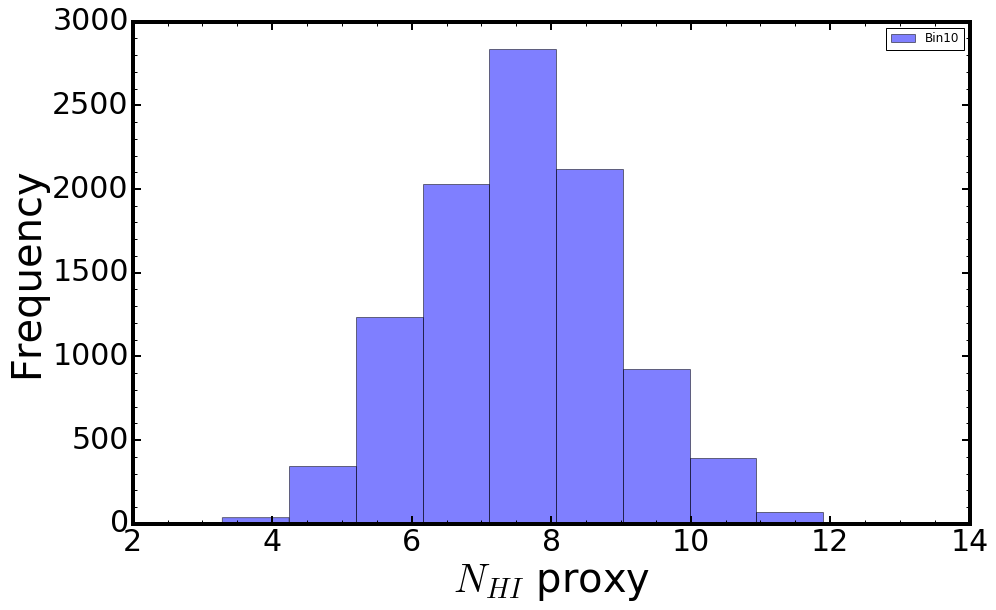

In [4]:
names = np.sort(list(bindata.keys()))
means = []
stdevs =[]
means0 = []
for name in names:
    plt.clf()
    sim = bootstrap(np.array(bindata[name]), 10000)
    means.append(np.mean(sim))
    stdevs.append(np.std(sim))
    means0.append(np.mean(np.array(bindata[name])))
    plt.hist(sim, label = name, alpha=0.5)
    plt.ylabel('Frequency', fontsize = 40)
    plt.xlabel('$N_{HI}$ proxy', fontsize = 40)
    plt.minorticks_on()
    plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
    plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
    plt.legend()


In [5]:
print('The mean of the means from Bins 1 - 10: =')
print('means = ' + str(np.round(means,3)))

The mean of the means from Bins 1 - 10: =
means = [ 11.82   13.501  11.666   6.205  15.083  12.798   6.797  11.313   8.274
   7.575]


In [6]:
print('The standard devation of the means from Bins 1 - 10: =')
print('Std. Devs. = ' + str(np.round(stdevs,3)))

The standard devation of the means from Bins 1 - 10: =
Std. Devs. = [ 3.727  5.218  4.537  2.152  4.816  4.437  1.637  6.145  2.288  1.374]


In [7]:
diff = np.abs(np.array(means0)-np.array(means))/np.array(means0)
print('Percent differences = ')
str(np.round(diff*100, 2))

Percent differences = 


'[ 0.05  0.31  0.2   0.15  0.46  0.02  0.05  0.24  0.14  0.05]'

In [8]:
new_data = pd.read_csv('WNHIDLAs_new.dat') 
new_data.head()

,W2796,logNHI,loerr,hierr
0,0.6000,21.07,0.16,0.12
1,1.0095,21.13,0.21,0.14
2,1.2095,21.06,0.21,0.15
3,1.4100,20.79,0.18,0.13
4,1.6600,21.18,0.17,0.12


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


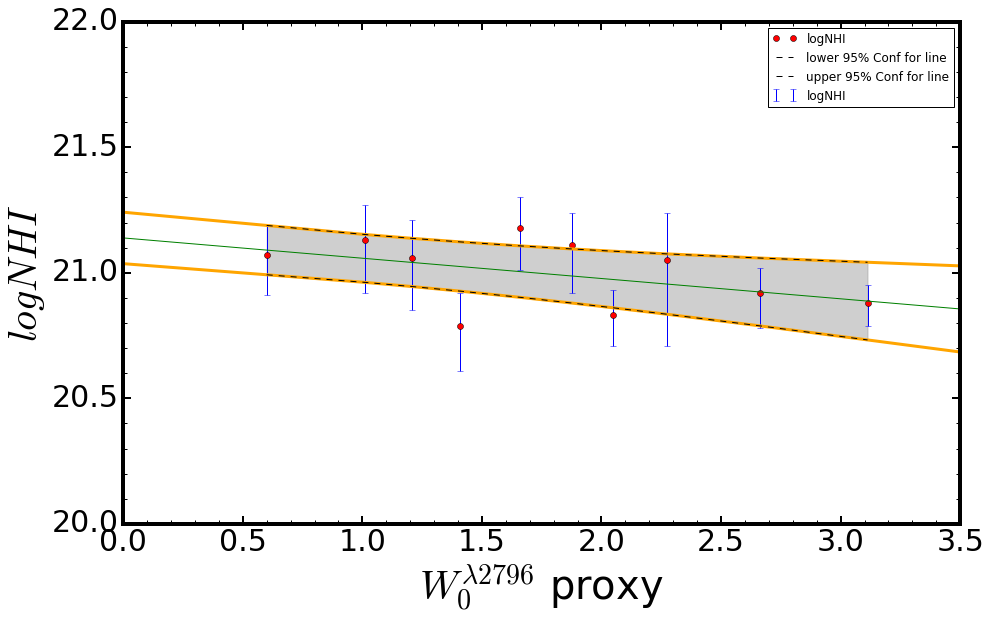

In [9]:
plt.plot(new_data.W2796, new_data.logNHI, 'ro')
plt.errorbar(new_data.W2796, new_data.logNHI, yerr = [new_data.loerr, new_data.hierr], fmt='none')
plt.ylabel('$log NHI$', fontsize = 40)
plt.xlabel('$W_{0}^{\lambda2796}$ proxy', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
plt.ylim(20,22)

#Fit a line through these points.
model = sm.WLS(new_data.logNHI, sm.add_constant(new_data.W2796), weights=1./new_data.hierr)
fitted = model.fit()
sdev, lower, upper = wls_prediction_std(fitted)
W = np.arange(0, 4, 0.1)
plt.plot(W, fitted.params[0] + W*fitted.params[1], 'g-')
fitted.summary2()

#Plotting the 95% confidence interval for the line above.
y_hat = new_data.W2796*fitted.params[1] + fitted.params[0]
y_err = new_data.logNHI - y_hat
mean_centers = new_data.W2796.T[1].mean()
n = len(new_data.W2796)
dof = n - 2 
t = stats.t.ppf(1-0.025, df=dof) #95% CONFIDENCE INTERVAL FOR THE REGRRESSION LINE.
s_err = np.sum(np.power(y_err, 2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((new_data.W2796-mean_centers),2)/((np.sum(np.power(new_data.W2796,2))) - n*(np.power(mean_centers,2))))))
upper = new_data.W2796*fitted.params[1] + fitted.params[0] + abs(conf)
lower = new_data.W2796*fitted.params[1] + fitted.params[0] - abs(conf)
plt.fill_between(new_data.W2796, lower, upper, color='#888888', alpha=0.4)
plt.xlim(0,3.5)


from scipy.interpolate import InterpolatedUnivariateSpline
lower_int = InterpolatedUnivariateSpline(new_data.W2796, lower, k=1)
upper_int = InterpolatedUnivariateSpline(new_data.W2796, upper, k=1)

W=np.arange(0.,4,0.05)

plt.plot(W, lower_int(W), 'orange', linewidth=3)
plt.plot(W, upper_int(W), 'orange', linewidth=3)

plt.plot(new_data.W2796, lower, 'k--', label='lower 95% Conf for line')
plt.plot(new_data.W2796, upper, 'k--', label='upper 95% Conf for line')
plt.legend()

# <center >  August 20, 2016: FIT a line through the $f(N_{NHI})$ </center>

In [10]:
def fNfit(N, a, b):
    return a*N**b

In [11]:
#August 19 Data from Sandhya
logNHI = np.array([+20.45, +20.75, +21.05, +21.35, +21.65])
logfN =  np.array([-22.31, -22.45, -23.09, -23.56, -23.99])
logfNminuserr = np.array([-22.44, -22.56, -22.95, -23.75, -23.79]) 
logfNpluserr = np.array([-22.21, -22.36, -23.23, -23.41, -24.19])

In [12]:
#Convert to real space
NHI = 10**logNHI
fN =  10**logfN
fNminuserr = 10**logfNminuserr
minuserr = fN-fNminuserr
fNpluserr = 10**logfNpluserr
pluserr = fNpluserr - fN

In [13]:
#Do the fit
p0=[1., -1.]
popt0, pcov0 = optimization.curve_fit(fNfit, NHI, fN, p0, pluserr)
error0 = np.sqrt(pcov0.diagonal())
print(" ")
print(" ")
print("   a  =     %.3e" % popt0[0] + '  \pm   %.3e' % error0[0])
print("   b  =    %.3e" % popt0[1] + '  \pm   %.3e' % error0[1])
print(" ")
print(" ")

 
 
   a  =     9.881e+06  \pm   6.725e+07
   b  =    -1.429e+00  \pm   1.413e-01
 
 


/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


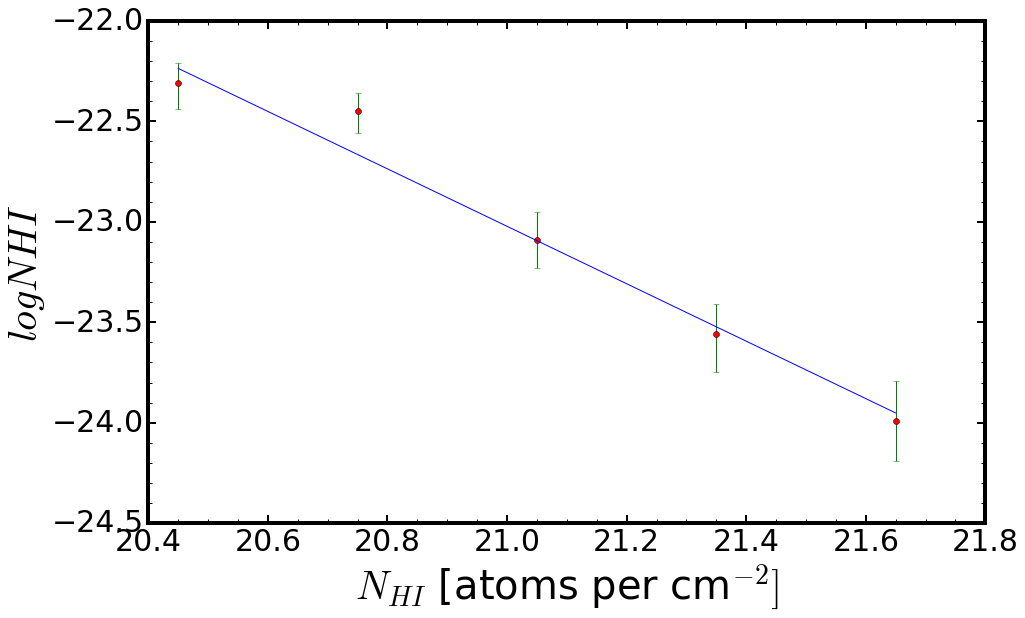

In [14]:
#Plot results
plt.plot(logNHI, logfN, 'ro')
plt.plot(logNHI, np.log10(fNfit(NHI, popt0[0], popt0[1])))
plt.errorbar(logNHI, logfN, yerr = [logfN-logfNminuserr, logfNpluserr-logfN], fmt='none')
plt.ylabel('$log NHI$', fontsize = 40)
plt.xlabel('$N_{HI}$ [atoms per cm$^{-2}]$', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)
#plt.ylim(-0.0005,0.0005)

# <center >  In LOG-SPACE: FIT a line through the $f(N_{NHI})$ in log-space</center>

In [15]:
def linearfit(x, m, b):
    return m*x + b

In [19]:
popt0, pcov0 = optimization.curve_fit(linearfit, logNHI, logfN, p0,  logfNpluserr-logfN)
error0 = np.sqrt(pcov0.diagonal())
print(" ")
print(" ")
print("   slope    =    %.3f" % popt0[0] + '  \pm   %.3f' % error0[0])
print("   intecept =     %.3f" % popt0[1] + '  \pm   %.3f' % error0[1])
print(" ")
print(" ")

 
 
   slope    =    -1.457  \pm   0.199
   intecept =     7.613  \pm   4.147
 
 


In [17]:
#Plotting the 95% confidence interval for the line above.
y_hat = new_data.W2796*fitted.params[1] + fitted.params[0]
y_err = new_data.logNHI - y_hat
mean_centers = new_data.W2796.T[1].mean()
n = len(new_data.W2796)
dof = n - 2 

20.75

/home/ec2-user/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


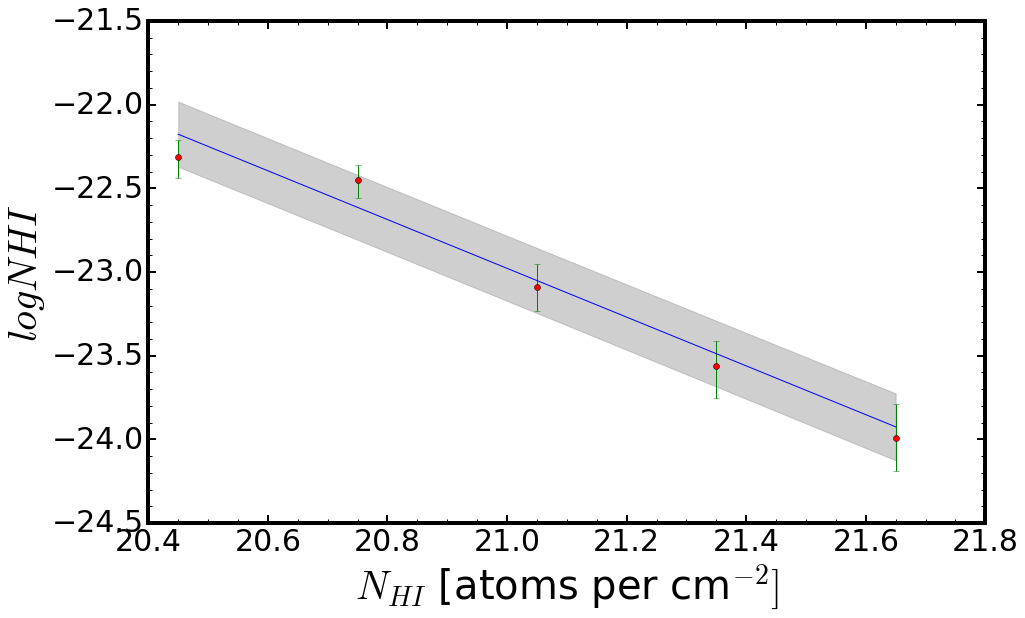

In [18]:
plt.plot(logNHI, logfN, 'ro')
plt.plot(logNHI, linearfit(logNHI, popt0[0], popt0[1]))
plt.errorbar(logNHI, logfN, yerr = [logfN-logfNminuserr, logfNpluserr-logfN], fmt='none')
plt.ylabel('$log NHI$', fontsize = 40)
plt.xlabel('$N_{HI}$ [atoms per cm$^{-2}]$', fontsize = 40)
plt.minorticks_on()
plt.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
plt.tick_params(which='minor',axis='both', color='k',length=4,width=1)

#Plotting the 95% confidence interval for the line above.
y_hat = logNHI*popt0[0] + popt0[1]
y_err = logfN - y_hat
mean_centers = logNHI.T[1].mean()
n = len(logNHI)
dof = n - 2 
t = stats.t.ppf(1-0.025, df=dof) #95% CONFIDENCE INTERVAL FOR THE REGRRESSION LINE.
s_err = np.sum(np.power(y_err, 2))
np.sqrt((s_err/(n-2)))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((logNHI-mean_centers),2)/((np.sum(np.power(logNHI,2))) - n*(np.power(mean_centers,2))))))
upper = logNHI*popt0[0] + popt0[1] + abs(conf)
lower = logNHI*popt0[0] + popt0[1] - abs(conf)
plt.fill_between(logNHI, lower, upper, color='#888888', alpha=0.4)
#plt.xlim(0,3.5)
mean_centers